In [111]:
import librosa
import numpy as np
import math
from baseline.cnn.data_processing.feature_extractor import FeatureExtractor
from baseline.cnn.utils import prepare_input_features, get_tf_feature, read_audio
import multiprocessing
import os
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from scipy.io import wavfile

In [45]:
 path_to_scene_files = "../../clarity_CEC2_data_train/clarity_data/train/scenes/"

In [46]:
import warnings
import numpy as np
import glob
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [47]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa.display

In [48]:
# get training and validation file names
scene_filenames = glob.glob(os.path.join(path_to_scene_files, '*_hr.wav'))

In [49]:
file = scene_filenames[0]
clean_filename = file.replace("_hr", "_target_anechoic_CH1")
interferer_filename = file.replace("_hr", "_interferer_CH1")
mix_filename = file.replace("_hr", "_mix_CH1")
print(clean_filename)
print(mix_filename)
print(interferer_filename)

../../clarity_CEC2_data_train/clarity_data/train/scenes\S00001_target_anechoic_CH1.wav
../../clarity_CEC2_data_train/clarity_data/train/scenes\S00001_mix_CH1.wav
../../clarity_CEC2_data_train/clarity_data/train/scenes\S00001_interferer_CH1.wav


In [133]:
sr = 8000
windowLength = 256
overlap = round(0.25 * windowLength)

clean, sr = read_audio(clean_filename, sr)
noise, sr = read_audio(interferer_filename, sr)
mix, sr = read_audio(mix_filename, sr)

In [134]:
ipd.Audio(data=clean, rate=sr)

In [135]:
ipd.Audio(data=noise, rate=sr)

In [136]:
ipd.Audio(data=mix, rate=sr)

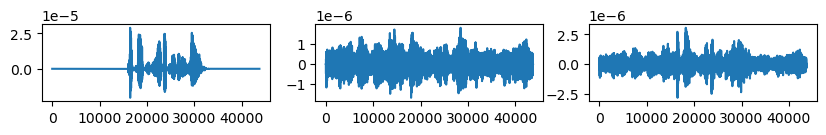

In [137]:

fig = plt.figure(figsize=(10, 1))
rows = 1
col = 3

fig.add_subplot(rows, col, 1)
plt.plot(clean)

fig.add_subplot(rows, col, 2)
plt.plot(noise)

fig.add_subplot(rows, col, 3)
plt.plot(mix)

plt.show()

In [138]:
clean_input_fe = FeatureExtractor(clean, 
                                  windowLength=windowLength, 
                                  overlap=overlap,
                                  sample_rate=sr)
noise_input_fe = FeatureExtractor(noise, 
                                  windowLength=windowLength, 
                                  overlap=overlap,
                                  sample_rate=sr)
mix_input_fe = FeatureExtractor(mix, 
                                  windowLength=windowLength, 
                                  overlap=overlap,
                                  sample_rate=sr)

In [139]:
clean_spec = np.abs(clean_input_fe.get_stft_spectrogram())
clean_mel = clean_input_fe.get_mel_spectrogram()

noise_spec = np.abs(noise_input_fe.get_stft_spectrogram())
noise_mel = noise_input_fe.get_mel_spectrogram()

mix_spec = np.abs(mix_input_fe.get_stft_spectrogram())
mix_mel = mix_input_fe.get_mel_spectrogram()

audio_files = [clean, noise, mix]
specs = [clean_spec, noise_spec, mix_spec]
mels = [clean_mel, noise_mel, mix_mel]

C:\Users\arrow\Desktop\venv\icassp\baseline\cnn\data_processing\feature_extractor.py:23: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.feature.melspectrogram(self.audio, sr=self.sample_rate, power=2.0, pad_mode='reflect',
C:\Users\arrow\Desktop\venv\icassp\baseline\cnn\data_processing\feature_extractor.py:23: FutureWarning: Pass y=[-4.2646236e-13  8.1117193e-13 -1.1725178e-12 ... -3.5399742e-11
  3.6543487e-11  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.feature.melspectrogram(self.audio, sr=self.sample_rate, power=2.0, pad_mode='reflect',


In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
for i in range(0, 3):
    librosa.display.waveshow(audio_files[i], sr=sr, ax=ax[0, i]) 
    librosa.display.specshow(specs[i], x_axis='time', ax=ax[1, i])
    librosa.display.specshow(librosa.power_to_db(specs[i]), x_axis='time', y_axis='log', ax=ax[2, i])

In [141]:
from scipy.fft import rfft, rfftfreq

43691


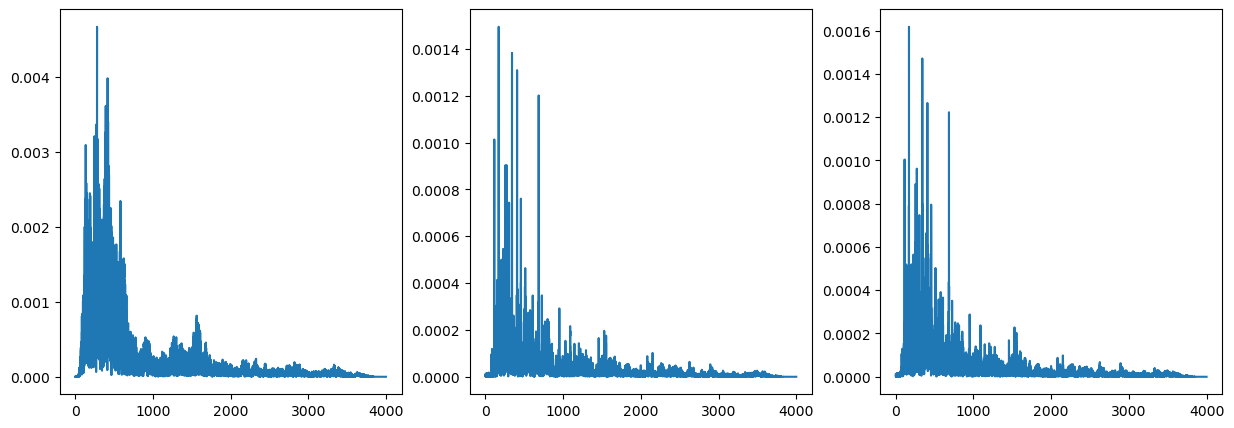

In [142]:
fig = plt.figure(figsize=(15, 5))
rows = 1
col = 3

fig.add_subplot(rows, col, 1)
N = len(clean)
print(N)
yf = rfft(clean)
xf = rfftfreq(N, 1 / sr)
plt.plot(np.abs(xf), np.abs(yf))

fig.add_subplot(rows, col, 2)
N = len(noise)
yf = rfft(noise)
xf = rfftfreq(N, 1 / sr)
plt.plot(np.abs(xf), np.abs(yf))

fig.add_subplot(rows, col, 3)
N = len(mix)
yf = rfft(mix)
xf = rfftfreq(N, 1 / sr)

plt.plot(np.abs(xf), np.abs(yf))
plt.show()

In [143]:
import noisereduce as nr

In [144]:
reduced_mix = nr.reduce_noise(y=mix, sr=sr)

reduced_input_fe = FeatureExtractor(reduced_mix, 
                                  windowLength=windowLength, 
                                  overlap=overlap,
                                  sample_rate=sr)

reduced_spec = np.abs(reduced_input_fe.get_stft_spectrogram())
reduced_mel = reduced_input_fe.get_mel_spectrogram()

audio_files.append(reduced_mix)
specs.append(reduced_spec)
mels.append(reduced_mel)

aud = reduced_input_fe.get_audio_from_mel_spectrogram(reduced_mel)

aud_input_fe = FeatureExtractor(aud, 
                                  windowLength=windowLength, 
                                  overlap=overlap,
                                  sample_rate=sr)

aud_spec = np.abs(aud_input_fe.get_stft_spectrogram())
aud_mel = aud_input_fe.get_mel_spectrogram()

audio_files.append(aud)
specs.append(aud_spec)
mels.append(aud_mel)

C:\Users\arrow\Desktop\venv\icassp\baseline\cnn\data_processing\feature_extractor.py:23: FutureWarning: Pass y=[-1.1586815e-09  1.1847524e-09  2.0451147e-09 ... -9.8076747e-10
 -7.1177586e-10 -1.3542663e-10] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.feature.melspectrogram(self.audio, sr=self.sample_rate, power=2.0, pad_mode='reflect',
C:\Users\arrow\Desktop\venv\icassp\baseline\cnn\data_processing\feature_extractor.py:23: FutureWarning: Pass y=[ 1.10727186e-07 -1.70246093e-08 -1.09194687e-07 ... -5.50526158e-09
 -3.77366005e-09 -2.03332928e-09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.feature.melspectrogram(self.audio, sr=self.sample_rate, power=2.0, pad_mode='reflect',


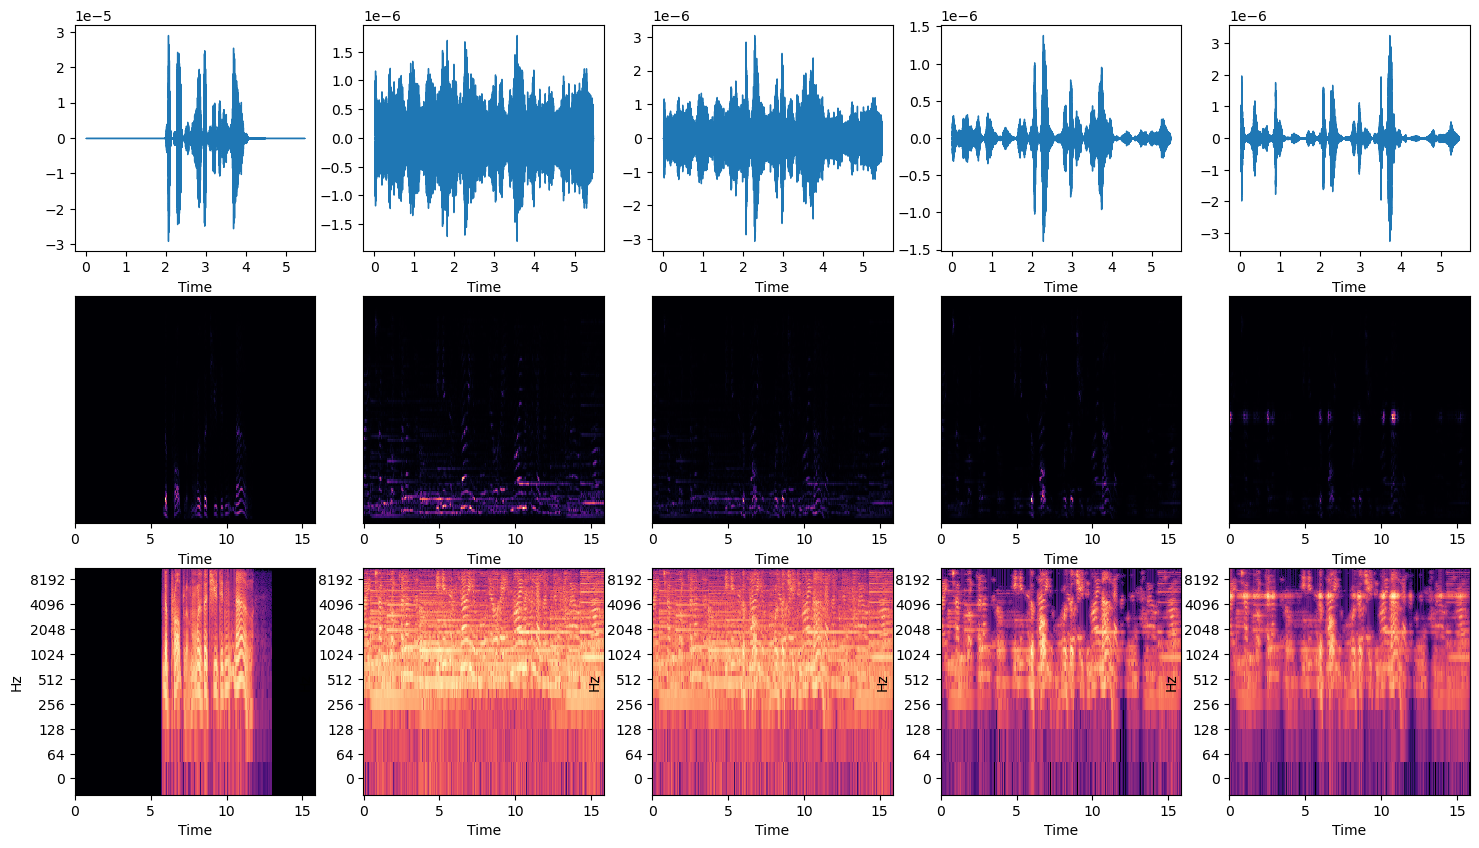

In [151]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(18,10))
for i in range(0, 5):
    librosa.display.waveshow(audio_files[i], sr=sr, ax=ax[0,i]) 
    librosa.display.specshow(specs[i], x_axis='time', ax=ax[1, i])
    librosa.display.specshow(librosa.power_to_db(specs[i]), x_axis='time', y_axis='log', ax=ax[2, i])

In [118]:
def get_features(file):
    fs, audio = wavfile.read(file)
    input_fe = FeatureExtractor(audio, 
                                  windowLength=windowLength, 
                                  overlap=overlap,
                                  sample_rate=fs)
    aud_spec = input_fe.get_stft_spectrogram()
    aud_mel = input_fe.get_mel_spectrogram()
    return audio, aud_spec, aud_mel

In [119]:
ch, spec, mel = get_features('./baseline/exp/enhanced_signals/S06001_L0064_enhanced.wav')

In [129]:
dataset = scene_filenames[:1000]
print(len(dataset))

1000


In [130]:
scene_train_set, scene_test_set  = train_test_split(dataset, test_size=0.2) 
print(len(scene_train_set), len(scene_test_set))

800 200
